In [1]:
import pickle
import numpy as np
import os
import matplotlib.pyplot as plt
def read_data(path):
    '''
    读取数据，返回x，y
    '''
    steps = []
    values = []
    with open(path) as fin:
        firstLine = True
        for line in fin.readlines():
            if firstLine:
                firstLine = False
                continue  
            else:
                line = line.strip().split(",")
                steps.append(int(line[1]))
                values.append(float(line[2]))
    return steps,values
def tsmooth(values, smooth = 0.9):
    """不需要传入step"""
    # [0.81 0.9 1]. res[2] = (0.81 * values[0] + 0.9 * values[1] + values[2]) / 2.71
    norm_factor = smooth + 1
    x = values[0]
    res = [x]
    for i in range(1, len(values)):
        x = x * smooth + values[i]  # 指数衰减
        res.append(x / norm_factor)
        #
        norm_factor *= smooth
        norm_factor += 1
    return res
def smooth(values,weight=0.85):
    last = values[0]
    smoothed = []
    for point in values:
        smoothed_val = last * weight + (1 - weight) * point
        smoothed.append(smoothed_val)
        last = smoothed_val
    return smoothed
def process_data(data):
    '''
    data -- list[three list]
    '''
    min_length = min([len(j[1]) for j in data])
    wr_base = np.array([j[1][:min_length] for j in data])
    avg = np.mean(wr_base,axis=0)
    std = np.std(wr_base,axis=0)
    r1 = list(map(lambda x: x[0]-x[1], zip(avg, std)))#上方差
    r2 = list(map(lambda x: x[0]+x[1], zip(avg, std)))#下方差
    x = data[0][0][:min_length]
    return avg,r1,r2,x

In [23]:
def draw(root_path,output_path,files,title,name="winRate",
                IS_QMIX=False,IS_GoMARL=False,IS_RODE=False,IS_ROMA=False,
                 IS_EOI=False,IS_MAVEN=False,IS_CDS=False,IS_DCC=False,IS_LDSA=False,IS_HSD=False,
                 TwoMillion=True
                ):
    '''
    root_path --
    output_path -- 
    fils -- lists of file names,e.g,[mappo_base,mappo_rsp,qmix_base,qmix_rsp]
    title -- output name,figure title
    postfix -- winRate or RSA
    '''
    #1.load data
    data1 = [] #qmix
    data2 = [] #GoMARL
    data3 = [] #RODE
    data4 = [] #ROMA
    data5 = [] #EOI
    data6 = [] #MAVEN
    data7 = [] #CDS
    data8 = [] #DCC
    data9 = [] #LDSA
    data0 = [] #HSD
    for i in range(1,4):
        _fn = files[0].format(i)
        data1.append(read_data(os.path.join(root_path,_fn)))
        _fn = files[1].format(i)
        data2.append(read_data(os.path.join(root_path,_fn)))
        _fn = files[2].format(i)
        data3.append(read_data(os.path.join(root_path,_fn)))
        _fn = files[3].format(i)
        data4.append(read_data(os.path.join(root_path,_fn)))
        _fn = files[4].format(i)
        data5.append(read_data(os.path.join(root_path,_fn)))
        _fn = files[5].format(i)
        data6.append(read_data(os.path.join(root_path,_fn)))
        _fn = files[6].format(i)
        data7.append(read_data(os.path.join(root_path,_fn)))
        _fn = files[7].format(i)
        data8.append(read_data(os.path.join(root_path,_fn)))
        _fn = files[8].format(i)
        data9.append(read_data(os.path.join(root_path,_fn)))
        _fn = files[9].format(i)
        data0.append(read_data(os.path.join(root_path,_fn)))
        
    #2 处理数据
    qmix_avg,qmix_r1,qmix_r2,qmix_x = process_data(data1)
    group_avg,group_r1,group_r2,group_x = process_data(data2)
    rode_avg,rode_r1,rode_r2,rode_x = process_data(data3)
    roma_avg,roma_r1,roma_r2,roma_x = process_data(data4)
    eoi_avg,eoi_r1,eoi_r2,eoi_x = process_data(data5)
    maven_avg,maven_r1,maven_r2,maven_x = process_data(data6)
    cds_avg,cds_r1,cds_r2,cds_x = process_data(data7)
    dcc_avg,dcc_r1,dcc_r2,dcc_x = process_data(data8)
    ldsa_avg,ldsa_r1,ldsa_r2,ldsa_x = process_data(data9)   
    hsd_avg,hsd_r1,hsd_r2,hsd_x = process_data(data0)

    #3.plot
    if IS_QMIX:
        plt.plot(qmix_x,tsmooth(qmix_avg),color="blue",label="QMIX")
        plt.fill_between(qmix_x, tsmooth(qmix_r1), tsmooth(qmix_r2),color="blue", alpha=0.2)
#         plt.fill_between(qmix_x, tsmooth(qmix_r1), tsmooth(qmix_r1),color="royalblue", alpha=0.2)
    if IS_GoMARL:
        plt.plot(group_x,tsmooth(group_avg),color="darkorchid",label="GoMARL")
        plt.fill_between(group_x, tsmooth(group_r1), tsmooth(group_r2),color="darkorchid", alpha=0.2)
#         plt.fill_between(group_x, tsmooth(group_r1), tsmooth(group_r2),color="orchid", alpha=0.2)
    if IS_RODE:
        plt.plot(rode_x,tsmooth(rode_avg),color="green",label="RODE")
        plt.fill_between(rode_x, tsmooth(rode_r1), tsmooth(rode_r2),color="green", alpha=0.2)
#         plt.fill_between(rode_x, tsmooth(rode_r1), tsmooth(rode_r2),color="lightgreen", alpha=0.2)
    if IS_ROMA:
        plt.plot(roma_x,tsmooth(roma_avg),color="saddlebrown",label="ROMA")
        plt.fill_between(roma_x, tsmooth(roma_r1), tsmooth(roma_r2),color="saddlebrown", alpha=0.2)
#         plt.fill_between(roma_x, tsmooth(roma_r1), tsmooth(roma_r2),color="peachpuff", alpha=0.2)
    if IS_EOI:
        plt.plot(eoi_x,tsmooth(eoi_avg),color="red",label="EOI")
        plt.fill_between(eoi_x, tsmooth(eoi_r1), tsmooth(eoi_r2),color="red", alpha=0.2)
#         plt.fill_between(eoi_x, tsmooth(eoi_r1), tsmooth(eoi_r2),color="lightcoral", alpha=0.2)
    if IS_MAVEN:
        plt.plot(maven_x,tsmooth(maven_avg),color="black",label="MAVEN")
        plt.fill_between(maven_x, tsmooth(maven_r1), tsmooth(maven_r2),color="black", alpha=0.2)
#         plt.fill_between(maven_x, tsmooth(maven_r1), tsmooth(maven_r2),color="grey", alpha=0.2)
    if IS_CDS:
        plt.plot(cds_x,tsmooth(cds_avg),color="orange",label="CDS")
        plt.fill_between(cds_x, tsmooth(cds_r1), tsmooth(cds_r2),color="orange", alpha=0.2)
#         plt.fill_between(cds_x, tsmooth(cds_r1), tsmooth(cds_r2),color="tan", alpha=0.2)
    if IS_DCC:
        plt.plot(dcc_x,tsmooth(dcc_avg),color="deepskyblue",label="DCC")
        plt.fill_between(dcc_x, tsmooth(dcc_r1), tsmooth(dcc_r2),color="deepskyblue", alpha=0.2)
#         plt.fill_between(dcc_x, tsmooth(dcc_r1), tsmooth(dcc_r2),color="lightskyblue", alpha=0.2)
    if IS_LDSA:
        plt.plot(ldsa_x,tsmooth(ldsa_avg),color="deeppink",label="LDSA")
        plt.fill_between(ldsa_x, tsmooth(ldsa_r1), tsmooth(ldsa_r2),color="deeppink", alpha=0.2)
#         plt.fill_between(ldsa_x, tsmooth(ldsa_r1), tsmooth(ldsa_r2),color="pink", alpha=0.2)
    if IS_HSD:
        plt.plot(hsd_x,tsmooth(hsd_avg),color="indigo",label="HSD")
        plt.fill_between(hsd_x, tsmooth(hsd_r1), tsmooth(hsd_r2),color="indigo", alpha=0.2)
#         plt.fill_between(hsd_x, tsmooth(hsd_r1), tsmooth(hsd_r2),color="blueviolet", alpha=0.2)
    if TwoMillion:
        #DCC,HSD,LDSA,MAVEN,CDS,EOI,RODE
        xticks_x = [0,200000,400000,600000,800000,1000000,1200000,1400000,1600000,1800000,2000000]
        xticks_y = ["0","0.2M","0.4M","0.6M","0.8M","1M","1.2M","1.4M","1.6M","1.8M","2M"]
    else:
        #ROMA,GoMARL,QMIX
        xticks_x = [0,1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000,10000000]
        xticks_y = ["0","1M","2M","3M","4M","5M","6M","7M","8M","9M","10M"]
    plt.xticks(xticks_x,xticks_y)
    plt.xlabel("Steps")
    plt.yticks([0,0.2,0.4,0.6,0.8,1.0],["0","20","40","60","80","100"])
    plt.ylabel("test winning rate")
    plt.title(title)
    #plt.gcf().set_size_inches((18,4)) #拉宽x轴，默认(6,4)
    plt.legend()
    #plt.legend(frameon=False,fontsize='small',ncol=4)
#     plt.legend(frameon=False,ncol=3)
    plt.savefig(os.path.join(output_path,name+".jpg"),dpi=400)
    plt.show()    
#     return mappo_ftqs_x,mappo_wr_ftq_avg,mappo_r1_ftq,mappo_r2_ftq,mappo_bases_x,mappo_wr_base_avg,mappo_r1_base,mappo_r2_base,\
# qmix_ftqs_x,qmix_wr_ftq_avg,qmix_r1_ftq,qmix_r2_ftq,qmix_bases_x,qmix_wr_base_avg,qmix_r1_base,qmix_r2_base

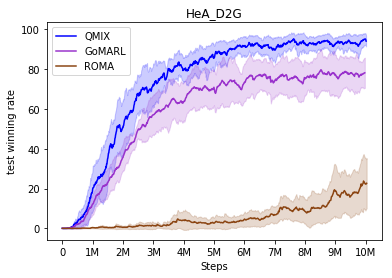

In [24]:
root_path = "D:/data/Env/expData/"
output_path = "D:/data/Env/Figs/"
files = [
    "qmix_HeAD2G_rep{}.csv", #qmix
    "GoMARL_HeAD2G_rep{}.csv", #GoMARL
    "Rode_HeAD2G_rep{}.csv", #RODE
    "Roma_HeAD2G_rep{}.csv", #ROMA
    "GoMARL_HeAD2G_rep{}.csv", #EOI
    "GoMARL_HeAD2G_rep{}.csv", #MAVEN
    "GoMARL_HeAD2G_rep{}.csv", #CDS
    "dcc_HeAD2G_rep{}.csv", #DCC
    "GoMARL_HeAD2G_rep{}.csv", #LDSA
    "hsd_HeAD2G_rep{}.csv", #HSD
]
draw(root_path,output_path,files,"HeA_D2G",name="HeA_D2G1",IS_ROMA=True,IS_GoMARL=True,IS_QMIX=True,TwoMillion=False)

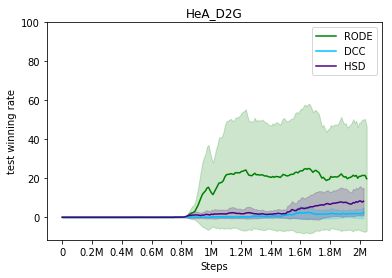

In [25]:
root_path = "D:/data/Env/expData/"
output_path = "D:/data/Env/Figs/"
files = [
    "qmix_HeAD2G_rep{}.csv", #qmix
    "GoMARL_HeAD2G_rep{}.csv", #GoMARL
    "Rode_HeAD2G_rep{}.csv", #RODE
    "Roma_HeAD2G_rep{}.csv", #ROMA
    "GoMARL_HeAD2G_rep{}.csv", #EOI
    "GoMARL_HeAD2G_rep{}.csv", #MAVEN
    "GoMARL_HeAD2G_rep{}.csv", #CDS
    "dcc_HeAD2G_rep{}.csv", #DCC
    "GoMARL_HeAD2G_rep{}.csv", #LDSA
    "hsd_HeAD2G_rep{}.csv", #HSD
]
draw(root_path,output_path,files,"HeA_D2G",name="HeA_D2G2",IS_DCC=True,IS_RODE=True,IS_HSD=True,TwoMillion=True)

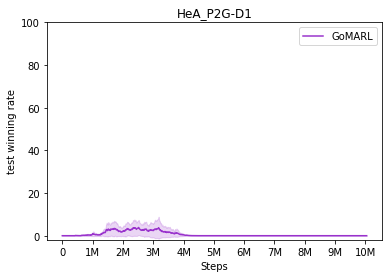

In [26]:
root_path = "D:/data/Env/expData/"
output_path = "D:/data/Env/Figs/"
files = [
    "GoMARL_HeAP2GD1_rep{}.csv", #qmix
    "GoMARL_HeAP2GD1_rep{}.csv", #GoMARL
    "GoMARL_HeAP2GD1_rep{}.csv", #RODE
    "GoMARL_HeAP2GD1_rep{}.csv", #ROMA
    "GoMARL_HeAP2GD1_rep{}.csv", #EOI
    "GoMARL_HeAP2GD1_rep{}.csv", #MAVEN
    "GoMARL_HeAP2GD1_rep{}.csv", #CDS
    "GoMARL_HeAP2GD1_rep{}.csv", #DCC
    "GoMARL_HeAP2GD1_rep{}.csv", #LDSA
    "GoMARL_HeAP2GD1_rep{}.csv", #HSD
]
draw(root_path,output_path,files,"HeA_P2G-D1",name="HeA_P2GD1",IS_GoMARL=True,TwoMillion=False)

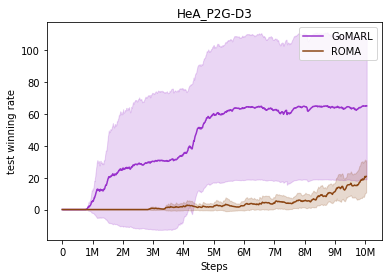

In [27]:
root_path = "D:/data/Env/expData/"
output_path = "D:/data/Env/Figs/"
files = [
    "GoMARL_HeAP2GD3_rep{}.csv", #qmix
    "GoMARL_HeAP2GD3_rep{}.csv", #GoMARL
    "GoMARL_HeAP2GD3_rep{}.csv", #RODE
    "Roma_HeAP2GD3_rep{}.csv", #ROMA
    "GoMARL_HeAP2GD3_rep{}.csv", #EOI
    "GoMARL_HeAP2GD3_rep{}.csv", #MAVEN
    "GoMARL_HeAP2GD3_rep{}.csv", #CDS
    "GoMARL_HeAP2GD3_rep{}.csv", #DCC
    "GoMARL_HeAP2GD3_rep{}.csv", #LDSA
    "GoMARL_HeAP2GD3_rep{}.csv", #HSD
]
draw(root_path,output_path,files,"HeA_P2G-D3",name="HeA_P2GD3",IS_ROMA=True,IS_GoMARL=True,TwoMillion=False)

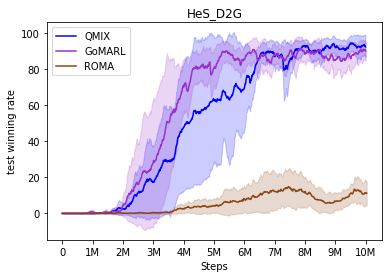

In [28]:
root_path = "D:/data/Env/expData/"
output_path = "D:/data/Env/Figs/"
files = [
    "qmix_HeSD2G_rep{}.csv", #qmix
    "GoMARL_HeSD2G_rep{}.csv", #GoMARL
    "Rode_HeSD2G_rep{}.csv", #RODE
    "Roma_HeSD2G_rep{}.csv", #ROMA
    "GoMARL_HeSD2G_rep{}.csv", #EOI
    "GoMARL_HeSD2G_rep{}.csv", #MAVEN
    "GoMARL_HeSD2G_rep{}.csv", #CDS
    "GoMARL_HeSD2G_rep{}.csv", #DCC
    "GoMARL_HeSD2G_rep{}.csv", #LDSA
    "GoMARL_HeSD2G_rep{}.csv", #HSD
]
draw(root_path,output_path,files,"HeS_D2G",name="HeS_D2G1",IS_ROMA=True,IS_GoMARL=True,IS_QMIX=True,TwoMillion=False)

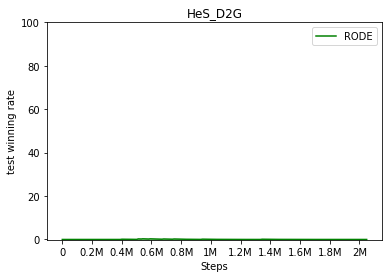

In [29]:
root_path = "D:/data/Env/expData/"
output_path = "D:/data/Env/Figs/"
files = [
    "qmix_HeSD2G_rep{}.csv", #qmix
    "GoMARL_HeSD2G_rep{}.csv", #GoMARL
    "Rode_HeSD2G_rep{}.csv", #RODE
    "Roma_HeSD2G_rep{}.csv", #ROMA
    "GoMARL_HeSD2G_rep{}.csv", #EOI
    "GoMARL_HeSD2G_rep{}.csv", #MAVEN
    "GoMARL_HeSD2G_rep{}.csv", #CDS
    "GoMARL_HeSD2G_rep{}.csv", #DCC
    "GoMARL_HeSD2G_rep{}.csv", #LDSA
    "GoMARL_HeSD2G_rep{}.csv", #HSD
]
draw(root_path,output_path,files,"HeS_D2G",name="HeS_D2G2",IS_RODE=True,TwoMillion=True)

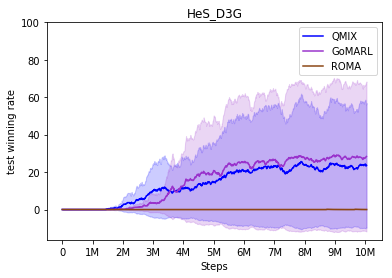

In [30]:
root_path = "D:/data/Env/expData/"
output_path = "D:/data/Env/Figs/"
files = [
    "qmix_HeSD3G_rep{}.csv", #qmix
    "GoMARL_HeSD3G_rep{}.csv", #GoMARL
    "Rode_HeSD3G_rep{}.csv", #RODE
    "Roma_HeSD3G_rep{}.csv", #ROMA
    "GoMARL_HeSD3G_rep{}.csv", #EOI
    "GoMARL_HeSD3G_rep{}.csv", #MAVEN
    "GoMARL_HeSD3G_rep{}.csv", #CDS
    "GoMARL_HeSD3G_rep{}.csv", #DCC
    "GoMARL_HeSD3G_rep{}.csv", #LDSA
    "GoMARL_HeSD3G_rep{}.csv", #HSD
]
draw(root_path,output_path,files,"HeS_D3G",name="HeS_D3G1",IS_ROMA=True,IS_GoMARL=True,IS_QMIX=True,TwoMillion=False)

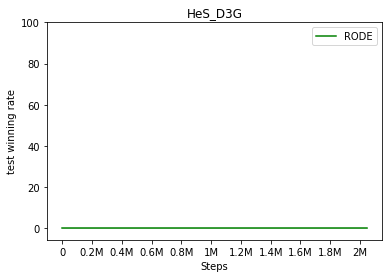

In [31]:
root_path = "D:/data/Env/expData/"
output_path = "D:/data/Env/Figs/"
files = [
    "qmix_HeSD3G_rep{}.csv", #qmix
    "GoMARL_HeSD3G_rep{}.csv", #GoMARL
    "Rode_HeSD3G_rep{}.csv", #RODE
    "Roma_HeSD3G_rep{}.csv", #ROMA
    "GoMARL_HeSD3G_rep{}.csv", #EOI
    "GoMARL_HeSD3G_rep{}.csv", #MAVEN
    "GoMARL_HeSD3G_rep{}.csv", #CDS
    "GoMARL_HeSD3G_rep{}.csv", #DCC
    "GoMARL_HeSD3G_rep{}.csv", #LDSA
    "GoMARL_HeSD3G_rep{}.csv", #HSD
]
draw(root_path,output_path,files,"HeS_D3G",name="HeS_D3G2",IS_RODE=True,TwoMillion=True)

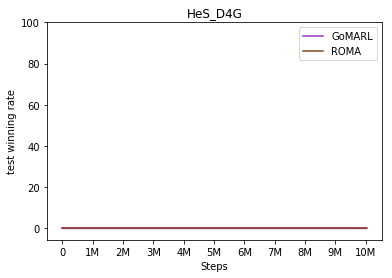

In [32]:
root_path = "D:/data/Env/expData/"
output_path = "D:/data/Env/Figs/"
files = [
    "GoMARL_HeSD4G_rep{}.csv", #qmix
    "GoMARL_HeSD4G_rep{}.csv", #GoMARL
    "Rode_HeSD4G_rep{}.csv", #RODE
    "Roma_HeSD4G_rep{}.csv", #ROMA
    "GoMARL_HeSD4G_rep{}.csv", #EOI
    "GoMARL_HeSD4G_rep{}.csv", #MAVEN
    "GoMARL_HeSD4G_rep{}.csv", #CDS
    "GoMARL_HeSD4G_rep{}.csv", #DCC
    "GoMARL_HeSD4G_rep{}.csv", #LDSA
    "GoMARL_HeSD4G_rep{}.csv", #HSD
]
draw(root_path,output_path,files,"HeS_D4G",name="HeS_D4G1",IS_ROMA=True,IS_GoMARL=True,TwoMillion=False)

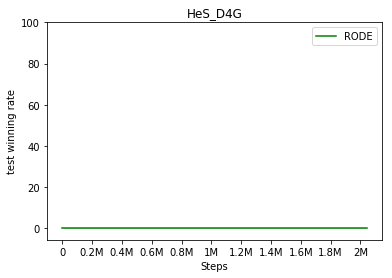

In [33]:
root_path = "D:/data/Env/expData/"
output_path = "D:/data/Env/Figs/"
files = [
    "qmix_HeSD4G_rep{}.csv", #qmix
    "GoMARL_HeSD4G_rep{}.csv", #GoMARL
    "Rode_HeSD4G_rep{}.csv", #RODE
    "Roma_HeSD4G_rep{}.csv", #ROMA
    "GoMARL_HeSD4G_rep{}.csv", #EOI
    "GoMARL_HeSD4G_rep{}.csv", #MAVEN
    "GoMARL_HeSD4G_rep{}.csv", #CDS
    "GoMARL_HeSD4G_rep{}.csv", #DCC
    "GoMARL_HeSD4G_rep{}.csv", #LDSA
    "GoMARL_HeSD4G_rep{}.csv", #HSD
]
draw(root_path,output_path,files,"HeS_D4G",name="HeS_D4G2",IS_RODE=True,TwoMillion=True)

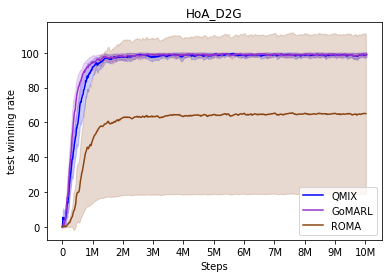

In [34]:
root_path = "D:/data/Env/expData/"
output_path = "D:/data/Env/Figs/"
files = [
    "qmix_HoAD2G_rep{}.csv", #qmix
    "GoMARL_HoAD2G_rep{}.csv", #GoMARL
    "Rode_HoAD2G_rep{}.csv", #RODE
    "Roma_HoAD2G_rep{}.csv", #ROMA
    "eoi_HoAD2G_rep{}.csv", #EOI
    "maven_HoAD2G_rep{}.csv", #MAVEN
    "GoMARL_HoAD2G_rep{}.csv", #CDS
    "dcc_HoAD2G_rep{}.csv", #DCC
    "ldsa_HoAD2G_rep{}.csv", #LDSA
    "hsd_HoAD2G_rep{}.csv", #HSD
]
draw(root_path,output_path,files,"HoA_D2G",name="HoA_D2G1",IS_ROMA=True,IS_GoMARL=True,IS_QMIX=True,TwoMillion=False)

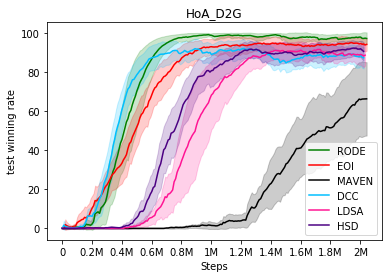

In [35]:
root_path = "D:/data/Env/expData/"
output_path = "D:/data/Env/Figs/"
files = [
    "qmix_HoAD2G_rep{}.csv", #qmix
    "GoMARL_HoAD2G_rep{}.csv", #GoMARL
    "Rode_HoAD2G_rep{}.csv", #RODE
    "Roma_HoAD2G_rep{}.csv", #ROMA
    "eoi_HoAD2G_rep{}.csv", #EOI
    "maven_HoAD2G_rep{}.csv", #MAVEN
    "GoMARL_HoAD2G_rep{}.csv", #CDS
    "dcc_HoAD2G_rep{}.csv", #DCC
    "ldsa_HoAD2G_rep{}.csv", #LDSA
    "hsd_HoAD2G_rep{}.csv", #HSD
]
draw(root_path,output_path,files,"HoA_D2G",name="HoA_D2G2",IS_RODE=True,IS_EOI=True,IS_MAVEN=True,IS_DCC=True,IS_LDSA=True,IS_HSD=True,TwoMillion=True)

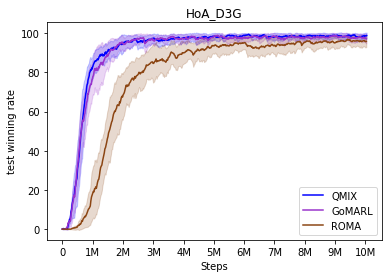

In [36]:
root_path = "D:/data/Env/expData/"
output_path = "D:/data/Env/Figs/"
files = [
    "qmix_HoAD3G_rep{}.csv", #qmix
    "GoMARL_HoAD3G_rep{}.csv", #GoMARL
    "Rode_HoAD3G_rep{}.csv", #RODE
    "Roma_HoAD3G_rep{}.csv", #ROMA
    "eoi_HoAD3G_rep{}.csv", #EOI
    "GoMARL_HoAD3G_rep{}.csv", #MAVEN
    "GoMARL_HoAD3G_rep{}.csv", #CDS
    "dcc_HoAD3G_rep{}.csv", #DCC
    "ldsa_HoAD3G_rep{}.csv", #LDSA
    "hsd_HoAD3G_rep{}.csv", #HSD
]
draw(root_path,output_path,files,"HoA_D3G",name="HoA_D3G1",IS_ROMA=True,IS_GoMARL=True,IS_QMIX=True,TwoMillion=False)

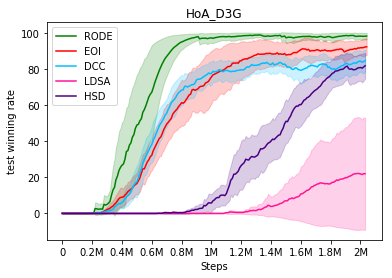

In [37]:
root_path = "D:/data/Env/expData/"
output_path = "D:/data/Env/Figs/"
files = [
    "qmix_HoAD3G_rep{}.csv", #qmix
    "GoMARL_HoAD3G_rep{}.csv", #GoMARL
    "Rode_HoAD3G_rep{}.csv", #RODE
    "Roma_HoAD3G_rep{}.csv", #ROMA
    "eoi_HoAD3G_rep{}.csv", #EOI
    "GoMARL_HoAD3G_rep{}.csv", #MAVEN
    "GoMARL_HoAD3G_rep{}.csv", #CDS
    "dcc_HoAD3G_rep{}.csv", #DCC
    "ldsa_HoAD3G_rep{}.csv", #LDSA
    "hsd_HoAD3G_rep{}.csv", #HSD
]
draw(root_path,output_path,files,"HoA_D3G",name="HoA_D3G2",IS_RODE=True,IS_EOI=True,IS_DCC=True,IS_LDSA=True,IS_HSD=True,TwoMillion=True)

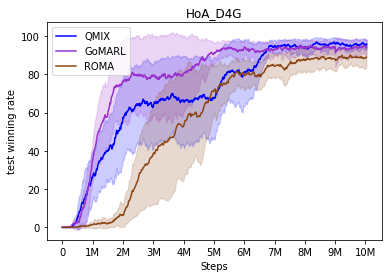

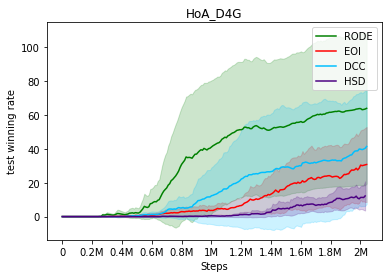

In [38]:
root_path = "D:/data/Env/expData/"
output_path = "D:/data/Env/Figs/"
files = [
    "qmix_HoAD4G_rep{}.csv", #qmix
    "GoMARL_HoAD4G_rep{}.csv", #GoMARL
    "Rode_HoAD4G_rep{}.csv", #RODE
    "Roma_HoAD4G_rep{}.csv", #ROMA
    "eoi_HoAD4G_rep{}.csv", #EOI
    "GoMARL_HoAD4G_rep{}.csv", #MAVEN
    "GoMARL_HoAD4G_rep{}.csv", #CDS
    "dcc_HoAD4G_rep{}.csv", #DCC
    "GoMARL_HoAD4G_rep{}.csv", #LDSA
    "hsd_HoAD4G_rep{}.csv", #HSD
]
draw(root_path,output_path,files,"HoA_D4G",name="HoA_D4G1",IS_ROMA=True,IS_GoMARL=True,IS_QMIX=True,TwoMillion=False)

files = [
    "qmix_HoAD4G_rep{}.csv", #qmix
    "GoMARL_HoAD4G_rep{}.csv", #GoMARL
    "Rode_HoAD4G_rep{}.csv", #RODE
    "Roma_HoAD4G_rep{}.csv", #ROMA
    "eoi_HoAD4G_rep{}.csv", #EOI
    "GoMARL_HoAD4G_rep{}.csv", #MAVEN
    "GoMARL_HoAD4G_rep{}.csv", #CDS
    "dcc_HoAD4G_rep{}.csv", #DCC
    "GoMARL_HoAD4G_rep{}.csv", #LDSA
    "hsd_HoAD4G_rep{}.csv", #HSD
]
draw(root_path,output_path,files,"HoA_D4G",name="HoA_D4G2",IS_RODE=True,IS_EOI=True,IS_DCC=True,IS_HSD=True,TwoMillion=True)

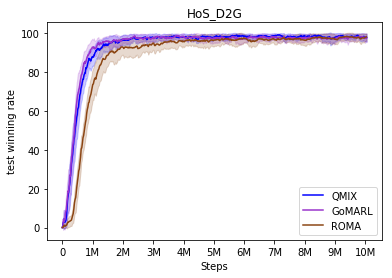

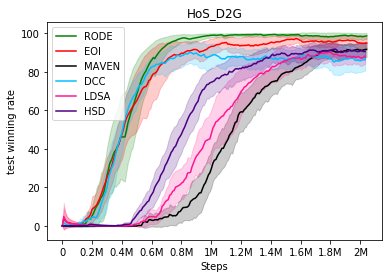

In [39]:
root_path = "D:/data/Env/expData/"
output_path = "D:/data/Env/Figs/"
files = [
    "qmix_HoSD2G_rep{}.csv", #qmix
    "GoMARL_HoSD2G_rep{}.csv", #GoMARL
    "Rode_HoSD2G_rep{}.csv", #RODE
    "Roma_HoSD2G_rep{}.csv", #ROMA
    "eoi_HoSD2G_rep{}.csv", #EOI
    "maven_HoSD2G_rep{}.csv", #MAVEN
    "GoMARL_HoSD2G_rep{}.csv", #CDS
    "dcc_HoSD2G_rep{}.csv", #DCC
    "ldsa_HoSD2G_rep{}.csv", #LDSA
    "hsd_HoSD2G_rep{}.csv", #HSD
]
draw(root_path,output_path,files,"HoS_D2G",name="HoS_D2G1",IS_ROMA=True,IS_GoMARL=True,IS_QMIX=True,TwoMillion=False)

files = [
    "qmix_HoSD2G_rep{}.csv", #qmix
    "GoMARL_HoSD2G_rep{}.csv", #GoMARL
    "Rode_HoSD2G_rep{}.csv", #RODE
    "Roma_HoSD2G_rep{}.csv", #ROMA
    "eoi_HoSD2G_rep{}.csv", #EOI
    "maven_HoSD2G_rep{}.csv", #MAVEN
    "GoMARL_HoSD2G_rep{}.csv", #CDS
    "dcc_HoSD2G_rep{}.csv", #DCC
    "ldsa_HoSD2G_rep{}.csv", #LDSA
    "hsd_HoSD2G_rep{}.csv", #HSD
]
draw(root_path,output_path,files,"HoS_D2G",name="HoS_D2G2",IS_RODE=True,IS_LDSA=True,IS_MAVEN=True,IS_EOI=True,IS_DCC=True,IS_HSD=True,TwoMillion=True)

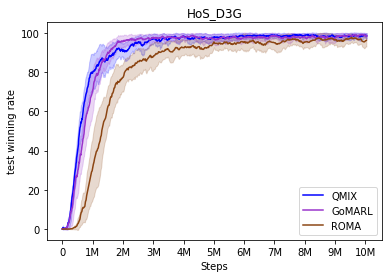

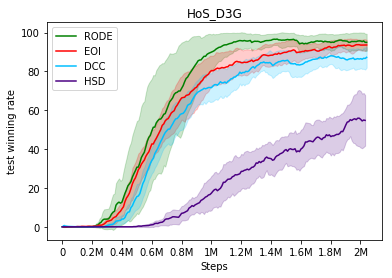

In [40]:
root_path = "D:/data/Env/expData/"
output_path = "D:/data/Env/Figs/"
files = [
    "qmix_HoSD3G_rep{}.csv", #qmix
    "GoMARL_HoSD3G_rep{}.csv", #GoMARL
    "Rode_HoSD3G_rep{}.csv", #RODE
    "Roma_HoSD3G_rep{}.csv", #ROMA
    "eoi_HoSD3G_rep{}.csv", #EOI
    "GoMARL_HoSD3G_rep{}.csv", #MAVEN
    "GoMARL_HoSD3G_rep{}.csv", #CDS
    "dcc_HoSD3G_rep{}.csv", #DCC
    "GoMARL_HoSD3G_rep{}.csv", #LDSA
    "hsd_HoSD3G_rep{}.csv", #HSD
]
draw(root_path,output_path,files,"HoS_D3G",name="HoS_D3G1",IS_ROMA=True,IS_GoMARL=True,IS_QMIX=True,TwoMillion=False)

files = [
    "qmix_HoSD3G_rep{}.csv", #qmix
    "GoMARL_HoSD3G_rep{}.csv", #GoMARL
    "Rode_HoSD3G_rep{}.csv", #RODE
    "Roma_HoSD3G_rep{}.csv", #ROMA
    "eoi_HoSD3G_rep{}.csv", #EOI
    "GoMARL_HoSD3G_rep{}.csv", #MAVEN
    "GoMARL_HoSD3G_rep{}.csv", #CDS
    "dcc_HoSD3G_rep{}.csv", #DCC
    "GoMARL_HoSD3G_rep{}.csv", #LDSA
    "hsd_HoSD3G_rep{}.csv", #HSD
]
draw(root_path,output_path,files,"HoS_D3G",name="HoS_D3G2",IS_RODE=True,IS_EOI=True,IS_DCC=True,IS_HSD=True,TwoMillion=True)

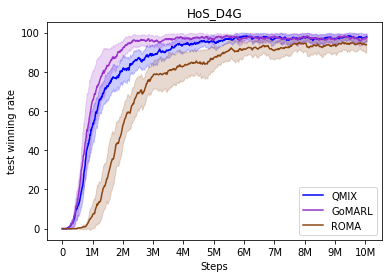

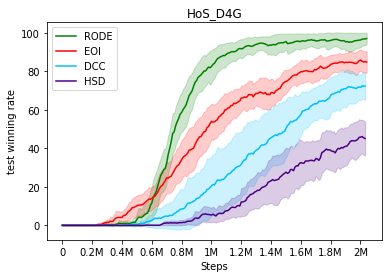

In [41]:
root_path = "D:/data/Env/expData/"
output_path = "D:/data/Env/Figs/"
files = [
    "qmix_HoSD4G_rep{}.csv", #qmix
    "GoMARL_HoSD4G_rep{}.csv", #GoMARL
    "Rode_HoSD4G_rep{}.csv", #RODE
    "Roma_HoSD4G_rep{}.csv", #ROMA
    "eoi_HoSD4G_rep{}.csv", #EOI
    "GoMARL_HoSD4G_rep{}.csv", #MAVEN
    "GoMARL_HoSD4G_rep{}.csv", #CDS
    "dcc_HoSD4G_rep{}.csv", #DCC
    "GoMARL_HoSD4G_rep{}.csv", #LDSA
    "hsd_HoSD4G_rep{}.csv", #HSD
]
draw(root_path,output_path,files,"HoS_D4G",name="HoS_D4G1",IS_ROMA=True,IS_GoMARL=True,IS_QMIX=True,TwoMillion=False)

files = [
    "qmix_HoSD4G_rep{}.csv", #qmix
    "GoMARL_HoSD4G_rep{}.csv", #GoMARL
    "Rode_HoSD4G_rep{}.csv", #RODE
    "Roma_HoSD4G_rep{}.csv", #ROMA
    "eoi_HoSD4G_rep{}.csv", #EOI
    "GoMARL_HoSD4G_rep{}.csv", #MAVEN
    "GoMARL_HoSD4G_rep{}.csv", #CDS
    "dcc_HoSD4G_rep{}.csv", #DCC
    "GoMARL_HoSD4G_rep{}.csv", #LDSA
    "hsd_HoSD4G_rep{}.csv", #HSD
]
draw(root_path,output_path,files,"HoS_D4G",name="HoS_D4G2",IS_RODE=True,IS_EOI=True,IS_DCC=True,IS_HSD=True,TwoMillion=True)

In [21]:
root_path = "D:/data/Env/expData/"
data1 = []
for i in range(1,4):
    _fn = "GoMARL_HeAP2GD1_rep{}.csv".format(i)
    data1.append(read_data(os.path.join(root_path,_fn)))
data1 = [max(i[1]) for i in data1]
print(data1)

[0.1875, 0.1875, 0.03125]


In [22]:
root_path = "D:/data/Env/expData/"
data = []
for i in range(1,4):
    _fn = "GoMARL_HeAP2GD1_rep{}.csv".format(i)
    data.append(read_data(os.path.join(root_path,_fn)))
min_length = min([len(j[1]) for j in data])
wr_base = np.array([j[1][:min_length] for j in data])
v = wr_base.std(axis=0).mean()
print(v)

0.007725971992347457
